# Exercise RL4.1: Policy evaluation

In this exercise, you will estimate the value of the states for a given policy in the Gridworld from exercise RL3.2 using the policy evaluation algorithm that was introduced in lectures.

Start by having a look at the following cell which implements some crucial code:
- Note that the four possible actions are coded by the integer numbers 0,1,2 and 3.
- Function "env_p": returns for a given state and action the next state into which the enviroments transitions, the reward the agent obtains and whether the next state is the goal state of the environment. In the code below the function "env_p" implements the gridworld.
- Array "policy": a 3-dimensional array implementing the policy. The first two indices give the row and column of the state in the gridworld. The third index refers to the action. The value is the probability that the policy carries out the action in a given state. In the code below the variable policy1 which implements the policy 1 from exercise RL3.2.

Pleae make sure that you understand the code. In what follows you will have to make modifications and write extensions to the code.


In [1]:
from matplotlib import pylab as plt
import numpy as np

# 
# define varibles encoding the actions:
# LEFT=0, DOWN=1, RIGHT=2, UP=3
# 
LEFT=0;
DOWN=1;
RIGHT=2;
UP=3;


# 
# Function implemeting the gridworld environment
# 
# Input:
# s: current state
# a: selected action
# 
# Output:
# snext: next state
# r: reward obtained
# goalstate: boolean variable indicating whether snext is the goal state or not
#
# Note that how the function is implemented it can only implement a deterministic environment as it
# returns a definite next state and reward. Probabilistic rewards and state changes are not possible.
#


def env_p(s,a):
    
    r=0
    snext=np.zeros(2).astype(int);
    goalstate=False
    
    # compute next state depeinding on selected action        
    if (a==LEFT):
        snext[0]=s[0]
        snext[1]=s[1]-1        
        
    elif (a==DOWN):
        snext[0]=s[0]+1
        snext[1]=s[1]
            
    elif (a==RIGHT):
        snext[0]=s[0]
        snext[1]=s[1]+1
            
    elif (a==UP):
        snext[0]=s[0]-1
        snext[1]=s[1]

        
    # check whether we hit the lower border of the grid world
    if snext[0]>1:
        snext[0]=1

    # check whether we hit the upper border of the grid world
    if snext[0]<0:
        snext[0]=0            
            
    # check whether we hit the left border of the grid world
    if snext[1]<0:
        snext[1]=0
        
    # check whether we hit the right border of the grid world
    if snext[1]>3:
        snext[1]=3

                        
    # cost of action 
    r=r-1 
            
    # check wether goal state was reached
    if (snext[0]==1) & (snext[1]==3):
        r=r+10 # obtain reward for reaching goal state
        goalstate=True
        
        
    # set reward and state if initial state was already the goal state
    if (s[0]==1) & (s[1]==3):    
        # agent was already in goal state, ignore action
        goalState=True
        r=0
        snext=s

                    
    return snext,r,goalstate



# array implementing policy 1        
policy1=np.zeros([2,4,4])
policy1[0,0,RIGHT]=1
policy1[0,1,RIGHT]=1
policy1[0,2,RIGHT]=1
policy1[0,3,DOWN]=1
policy1[1,0,RIGHT]=1
policy1[1,1,RIGHT]=1
policy1[1,2,RIGHT]=1


Implement the policy evaluation algorithm from the lecture to compute the value of each state for policy 1.  Perform $N=10$ iterations of the policy evaluation algorithm and plot the value function after each iteration. Does the value function converge towards the theoretical result computed in exercise RL3.2? How many iterations are required?

In [11]:
def display_grid(grid):
    fig, ax = plt.subplots()
    ax.matshow(grid, cmap='ocean')

    for i in range(grid.shape[1]):
        for j in range(grid.shape[0]):
            c = grid[j, i]
            ax.text(i, j, str(np.round(c, 3)), va='center', ha='center')

In [3]:
def policy_evaluation(value, policy, N):
    actions = 4
    for n in range(N):
        value_previous = value
        for i in range(value.shape[0]):
            for j in range(value.shape[1]):
                s = np.array([i,j])
                current_value = 0 
                for a in range(actions):
                    snext,r,goalstate = env_p(s,a)
                    current_value += policy[s[0],s[1],a] * (r + value_previous[snext[0], snext[1]])
                value[s[0],s[1]] = current_value
        display_grid(value)
        plt.title('n = {}'.format(n+1))
    return value

array([[6., 7., 8., 9.],
       [7., 8., 9., 0.]])

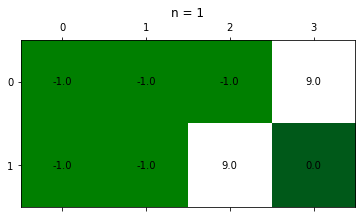

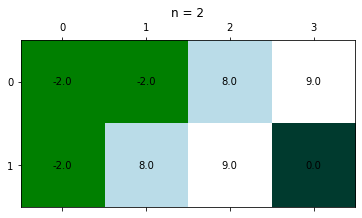

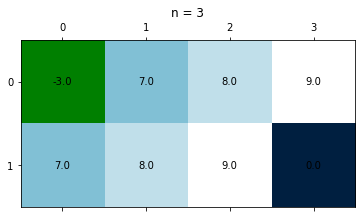

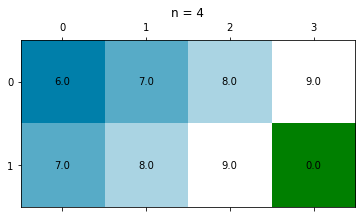

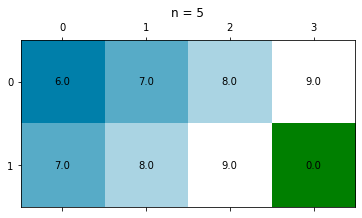

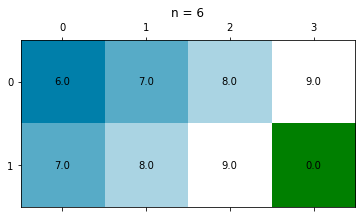

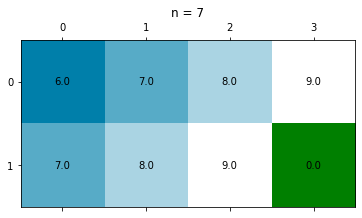

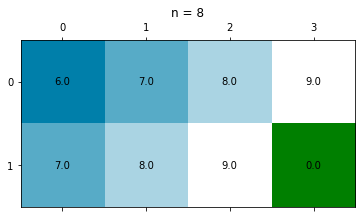

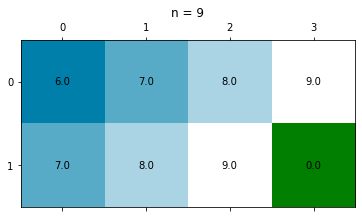

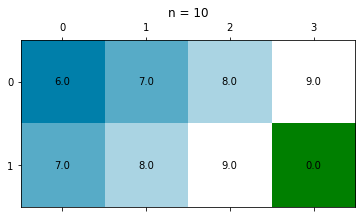

In [12]:
value = np.zeros((2,4))
actions = 4
N = 10

policy_evaluation(value, actions, policy1, N)

Next, write code that generates an array 'policy3' which implements policy 3 from exercise RL3.2. Use your policy evaluation algorithm to compute the value of that policy and compare the result to the exact solution computed in exercise RL3.2. How many iterations are required for the algorithm to obtain a suffciently close approximation to the exact solution?


In [13]:
# array implementing policy 3        
policy3=np.zeros([2,4,4])
policy3[0,0,RIGHT]=1
policy3[0,1,RIGHT]=0.5
policy3[0,1,DOWN]=0.5
policy3[0,2,RIGHT]=1
policy3[0,3,DOWN]=1
policy3[1,0,RIGHT]=1
policy3[1,1,RIGHT]=0.5
policy3[1,1,LEFT]=0.5
policy3[1,2,RIGHT]=1

array([[4.99997139, 5.99998569, 8.        , 9.        ],
       [4.99997139, 5.99998569, 9.        , 0.        ]])

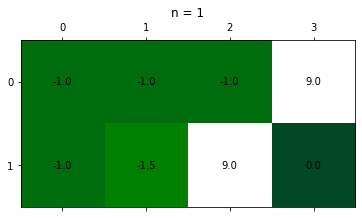

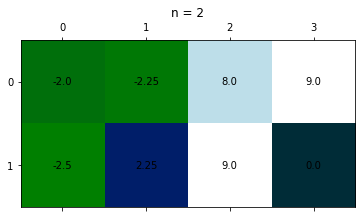

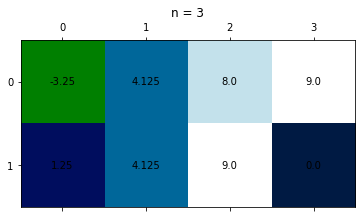

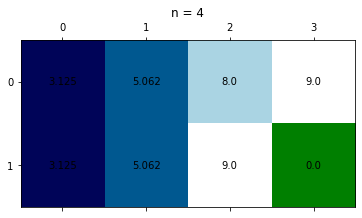

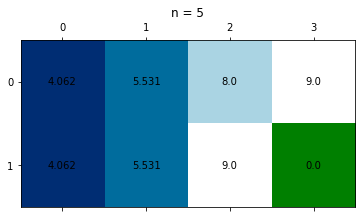

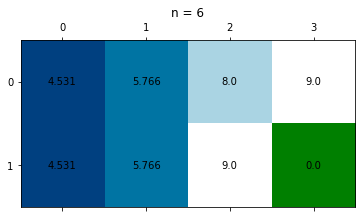

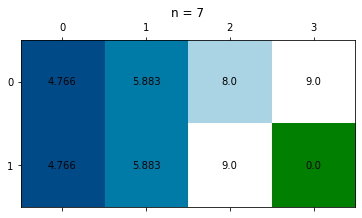

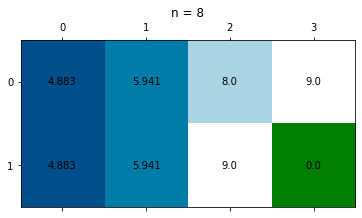

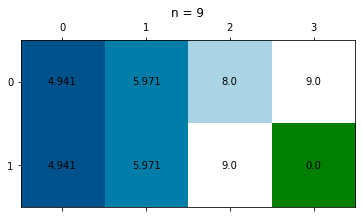

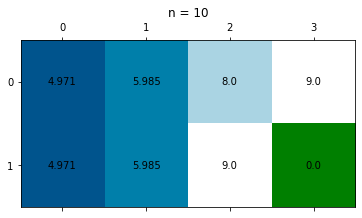

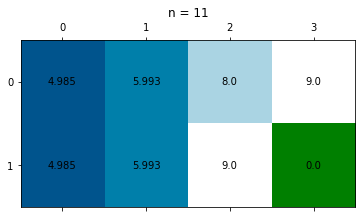

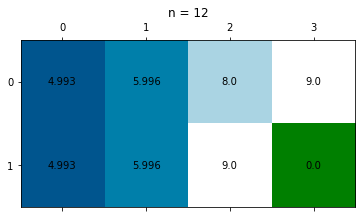

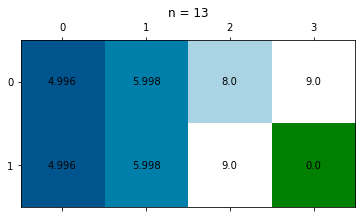

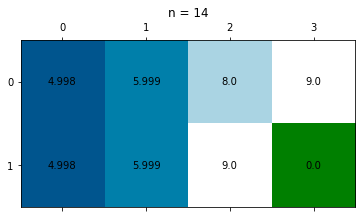

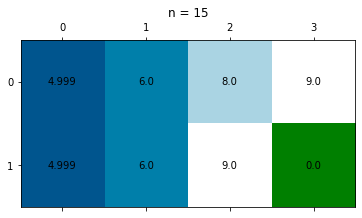

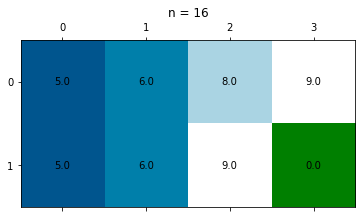

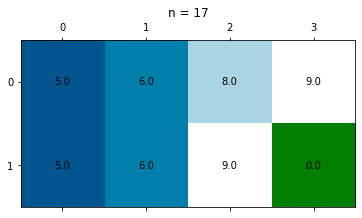

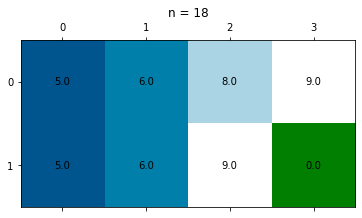

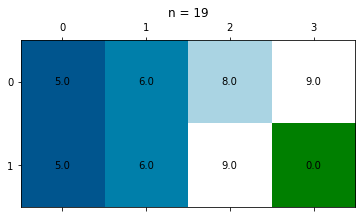

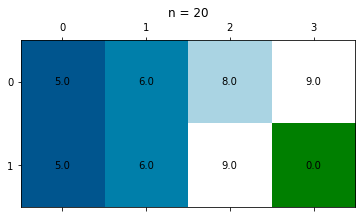

In [14]:
value = np.zeros((2,4))
actions = 4
N = 20

policy_evaluation(value, actions, policy3, N)

For policy 3, $N = 15$ seems fine.

# Exercise RL4.2:  Action-value and state-value function 
(1) Please give an equation of the state-value function $v(s)$ in terms of the action-value function $q(s,a)$ and the policy $\pi(s)$

(2) Please express the action-value function $q(s,a)$ in terms of the state-value function $v(s)$. What do you need in addition to $v(s)$?

(1) "Mariginalize out $a$"

$$v_\pi(s) = \sum_a \pi(s, a)~q_\pi(s,a)$$

(2) Need to know: which action is actually chosen from policy

$$ q_\pi(s,a) = \frac{v_\pi(s)}{\pi(s, a)}$$